# Polynomial Interpolation (cont.)
* linear interpolation
* cuadratic interpolation

## Linear Interpolation
* Reminder: Polynomial Interpolation: ONE unique $n^{th}$ order polynomial passes through n points.

* Given $(x_0,y_0)$ and $(x_1,y_1)$ a straight line passes through these points

<img src="imgs/diff_divid.png" width="400" />

The slope (tangent, inclination) is the same in both intervals so:
if $x$ is the point at which we want to interpolate the function $f(x)$ 

$$\frac{f(x)-f(x_0)}{x-x_0} = \frac{f(x_1)-f(x_0)}{x_1-x_0}$$

$$f(x)=f(x_0) + \frac{f(x_1) - f(x_0)}{x_1-x_0} (x-x_0) $$

And get the first order polynomial:

$$f_1(x) = b_0 + b_1 (x-x_0)$$
* where $b_0$ is the interception point an $b_1$ is the slope.


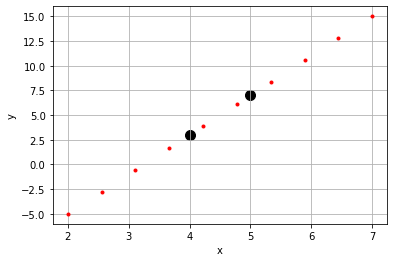

In [3]:
import numpy as np
x=np.array([4,5])
y=np.array([3,7])

xint=np.linspace(2,7,10)
yint=y[0]+((y[1]-y[0])/(x[1]-x[0]))*(xint-x[0])

import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.scatter(x,y,c='k',s=100)
ax.plot(xint,yint,'.r')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

## Cuadratic Interpolation (still polynomial interpolation)

* Reminder: Polynomial Interpolation: ONE unique $n^{th}$ order polynomial passes through n points.

* Given $(x_0,y_0)$, $(x_1,y_1)$ and $(x_2,y_2)$ a parabola passes through these points.


<img src="imgs/cuadratic_interpolation.png" width="300" />

Analogically to the first order polynomial, the second order polynomial can be written as (cuadratic polynomial formula):

$$f_1(x) = b_0 + b_1 (x-x_0)$$

$$f_2(x) = b_0 + b_1 (x-x_0)  + b_2 (x-x_0) (x-x_1) $$

Lets find $b_0, b_1, b_2$ looking at the polynomial above and substituting the values:


* $$ \text{at} \quad x=x_0 \quad f_2(x)=f(x_0)=b_0$$

$$ \rightarrow b_0 = f(x_0)$$

* $$ \text{at} \quad x=x_1 \quad f_2(x)=f(x_1)=b_0+b_1(x_1-x_0)$$

$$ \rightarrow b_1 = \frac{f(x_1)-f(x_0)}{x_1-x_0}$$

* $$ \text{at} \quad x=x_2 \quad f_2(x)=f(x_2)=b_0 + b_1 (x_2-x_0)  + b_2 (x_2-x_0) (x_2-x_1)$$

$$\rightarrow b_2 = \frac{\frac{f(x_2) - f(x_1)}{x_2 - x_1} - \frac{f(x_1) - f(x_0)}{x_1 - x_0}}{x_2-x_0}$$

#### Example 1:
Interpolate log10(5) using linear interpolation with two points x=4 and x=6

In [4]:
print(np.log10(2))
print(np.log10(6))

0.3010299956639812
0.7781512503836436


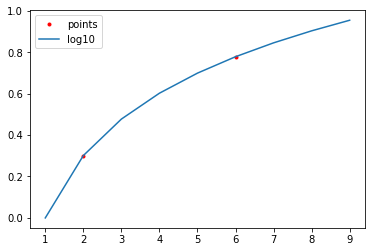

In [1]:
import numpy as np
x=np.array([2,6])
y=np.array([np.log10(2),np.log10(6)])

import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.plot(x,y,'.r',label='points')
xlog=np.array([i for i in range(1,10)])
ylog=np.array([np.log10(i) for i in range(1,10)])
ax.plot(xlog,ylog,label='log10')
ax.legend()

In [2]:
import numpy as np
x=np.array([2,6])
y=np.array([np.log10(2),np.log10(6)])

xint=5.0
yint=y[0]+((y[1]-y[0])/(x[1]-x[0]))*(xint-x[0])

print(f'interpolated value of log10(5): {yint:.2f}')
print(f'error:{100*np.abs((yint-np.log10(5))/np.log10(5)):.2f}%')

interpolated value of log10(5): 0.66
error:5.74%


In [17]:
np.log10(5)

0.6989700043360189

#### Example 2:
Interpolate log(5) using the points x=4.5 and x=5.5

In [7]:
import numpy as np
x=np.array([4.5,5.5])
y=np.array([np.log10(4.5),np.log10(5.5)])

xint=5.0
yint=y[0]+((y[1]-y[0])/(x[1]-x[0]))*(xint-x[0])

print(f'interpolated value of log10(5): {yint:.2f}')
print(f'error:{100*np.abs((yint-np.log10(5))/np.log10(5)):.2f}%')

interpolated value of log10(5): 0.70
error:0.31%


#### Conclusion: In the case when we want to approximate points that show nonlinear behaviour using linear approximation when we use two points the closer the points are the better is the approximation. 

# Newton’s Divided Difference Interpolating Polynomials
* We can generalize the linear and quadratic interpolation formulas for an n-th order polynomial passing through n+1 points


$$f_n(x) = b_0 + b_1 (x-x_0)  + b_2 (x-x_0) (x-x_1) + \cdots +  b_n(x- x_0)(x - x_1) \cdots (x - x_{n-1})$$

where the constants are:

* $b_0 = f(x_0)$
* $b_1 = f [x_0, x_1]$
* $b_2 = f [x_0, x_1, x_2]$
. . .
* $b_n = f [x_0, x_1,..., x_{n-1},x_n]$

$$b_0=f[x_i] = f(x_i) \quad \text{zeroth divided difference} $$

$$b_1=f[x_i,x_{j}] = \frac{f(x_{j}) - f(x_i)}{x_{j} - x_i} \quad \text{first divided difference} $$

$$b_2=f[x_i,x_{j},x_{k}] = \frac{f[x_{j},x_{i}] - f[x_k,x_{j}]}{x_{k}-x_i} \quad \text{second divided difference} $$

$$b_n=f[x_0, x_1,..., x_{n-1},x_n] = \frac{f[x_{n},x_{n-1},...,x_1] - f[x_{n-1},...,x_1,x_0]}{x_{n}-x_0}  \quad \text{n-th divided difference} $$

Hence n-th order Newton’s Divided Difference Interpolating Polynomial is:

$$f_n(x) = f(x_0) + (x - x_0) f[x_0, x_1] + (x - x_0)(x - x_1) f[x_0, x_1, x_2] +\cdots+ (x - x_0)(x - x_1) \cdots (x - x_{n-1}) f[x_0, x_1,..., x_{n-1},x_n]$$
 

So now we can rewrite:
* linear interpolation:
$$f(x) = f(x_0) + (x - x_0) f[x_0,x_1]$$
$$f(x) = b_0 + (x - x_0) b_1$$

* cubic interpolation:
$$f(x) = f(x_0) + (x - x_0) f[x_0, x_1] + (x - x_0)(x - x_1) f[x_0, x_1, x_2]$$
$$f(x) = b_0 + (x - x_0) b_1 + (x - x_0)(x - x_1) b_2$$

In [3]:
import numpy as np
x=np.array([4.5,5.5])
y=np.array([np.log10(4.5),np.log10(5.5)])

xint=5.0

b0=y[0]
b1=((y[1]-y[0])/(x[1]-x[0]))
yint=b0+b1*(xint-x[0])

print(f'interpolated value of log10(5): {yint:.2f}')
print(f'error:{100*np.abs((yint-np.log10(5))/np.log10(5)):.2f}%')

interpolated value of log10(5): 0.70
error:0.31%


In [4]:
b1

0.08715017571890016

### Cuadratic approximation using recursive function (found in internet)

In [6]:
# This formula calculates coefficients b0,b1,b2... 
# of the Newton divided differences
# (recursive code)

def b_coeffs(i,k,X,Y):
    # i, k are the first and last INDEX of `x`
    #If i+k>N
    if i+k>=len(X):
        return 0
    #Zeroth divided difference
    elif k == 0:
        return Y[i]
    #If higher divided difference
    else:
        return (b_coeffs(i+1, k-1, X, Y)-b_coeffs(i, k-1, X, Y))/(X[i+k]-X[i])

In [8]:
b_coeffs(0,2,x,y)

0

i, k are the first and last INDEX of `x`
for example:
* $b_0 = f [x_0]$ so the first index of x is 0 and the last index is 0
* $b_1 = f [x_0, x_1]$ so the first index of x is 0 and the last index is 1

## Full numerical realization can be found here (not-recursive)

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html

# Lets make small changes to the homeworks and partial exams...

### Homework5 (testing new idea of ):
* ***this is the right way to program - just making functions and classes and calling them***!!!



* create notebook called: homework_5.ipynb (no spaces please)

* inside write a function: `quadratic_interp(x,y,xinterp)`:

`cuadratic_interp(x,y,xinterp)` accepts three elements (vector `x`, vector `y` and float `xinterp` to be interpolated) an returns `yinterp`  value of the interpolated point `xinterp`


* ***similar problem will be in the next partial***!!!
* ***remember the function must not print anything, just return a single value***!!!